<a href="https://colab.research.google.com/github/Amalia-Saumi/Area-Cabang-1/blob/main/Digital_Skill_Fair_37_0__DSF_dibimbing_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORT LIBRARY**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

 **LOAD DATASET**

In [ ]:
# Load dataset Iris
iris = datasets.load_iris()

X = iris.data
y = iris.target
# Mengonversi data fitur dan target menjadi DataFrame
df_X = pd.DataFrame(X, columns=iris.feature_names)
df_y = pd.Series(y, name='target')

In [ ]:
df_X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
df_X.shape

(150, 4)

In [ ]:
df_y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [ ]:
# Gabungkan fitur dan target dalam satu DataFrame
df = pd.concat([df_X, df_y], axis=1)

df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [ ]:
df['target'].unique()

array([0, 1, 2])

In [ ]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
# Menggunakan PCA untuk mereduksi dimensi menjadi 2 fitur agar dapat divisualisasikan
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

**SPLIT DATA**

In [ ]:
# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)

**TRAIN THE MODEL**

In [ ]:
# Inisialisasi model KNN dengan k=3
knn = KNeighborsClassifier(n_neighbors=3)

# Training model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Predict & Evaluate**

In [ ]:
# Memprediksi dan mengevaluasi
y_pred_knn = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_knn)

print("Laporan Klasifikasi:")
print(f"Akurasi: {accuracy * 100:.2f}%")

Laporan Klasifikasi:
Akurasi: 100.00%


In [ ]:
# Menampilkan laporan klasifikasi

def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Evaluasi Model: {model_name}")
    print(f"Akurasi   : {accuracy:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print(f"F1-score  : {f1:.4f}")
    print("-----------------------------------")

# Evaluasi KNN
evaluate_model("KNN", y_test, y_pred_knn)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_knn))



Evaluasi Model: KNN
Akurasi   : 1.0000
Precision : 1.0000
Recall    : 1.0000
F1-score  : 1.0000
-----------------------------------

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



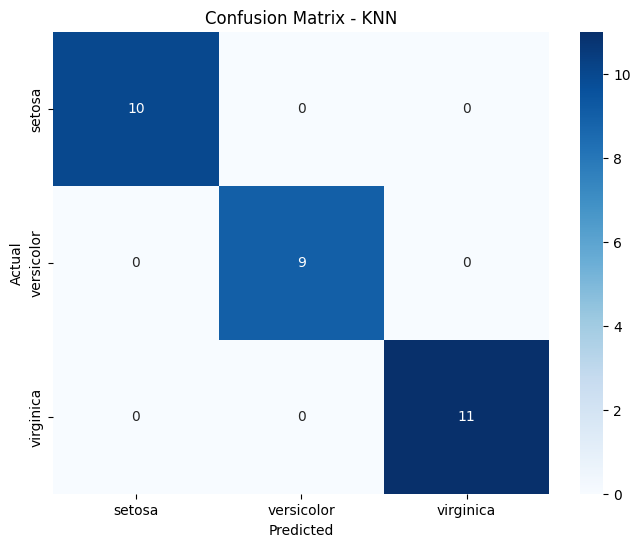

In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

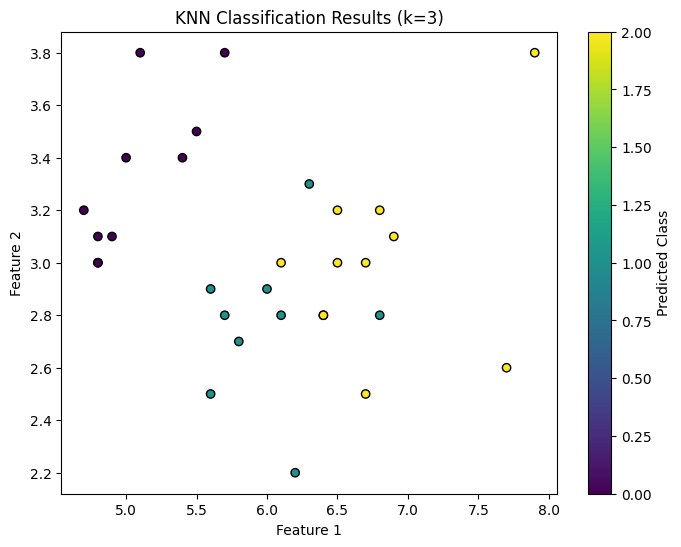

In [ ]:
# Visualisasi hasil klasifikasi KNN
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred_knn, cmap="viridis", edgecolors='k')

plt.colorbar(label="Predicted Class")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("KNN Classification Results (k=3)")
plt.show()

**TRAIN THE MODEL NB**

In [ ]:
# Inisialisasi model Naïve Bayes
nb = GaussianNB()

# Training model
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
# Memprediksi dan mengevaluasi
y_pred_nb = nb.predict(X_test)


accuracy_nb = accuracy_score(y_test, y_pred_nb)

print("Laporan Klasifikasi:")
print(f"Akurasi: {accuracy * 100:.2f}%")

Laporan Klasifikasi:
Akurasi: 100.00%


In [ ]:
# Menampilkan laporan klasifikasi
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    print(f"Evaluasi Model: {model_name}")
    print(f"Akurasi   : {accuracy:.4f}")
    print(f"Precision : {precision:.4f}")
    print(f"Recall    : {recall:.4f}")
    print(f"F1-score  : {f1:.4f}")
    print("-----------------------------------")

# Evaluasi NB
evaluate_model("Naive Bayes", y_test, y_pred_nb)
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_nb))




Evaluasi Model: Naive Bayes
Akurasi   : 0.9333
Precision : 0.9333
Recall    : 0.9333
F1-score  : 0.9333
-----------------------------------

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



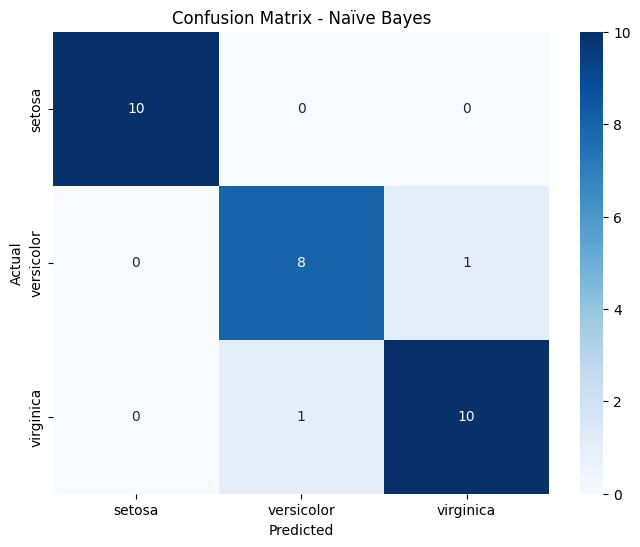

In [ ]:
# Confusion Matrix Naïve Bayes
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naïve Bayes')
plt.show()


<ipython-input-43-39c9c758b5e6>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=feature_df, palette="viridis")


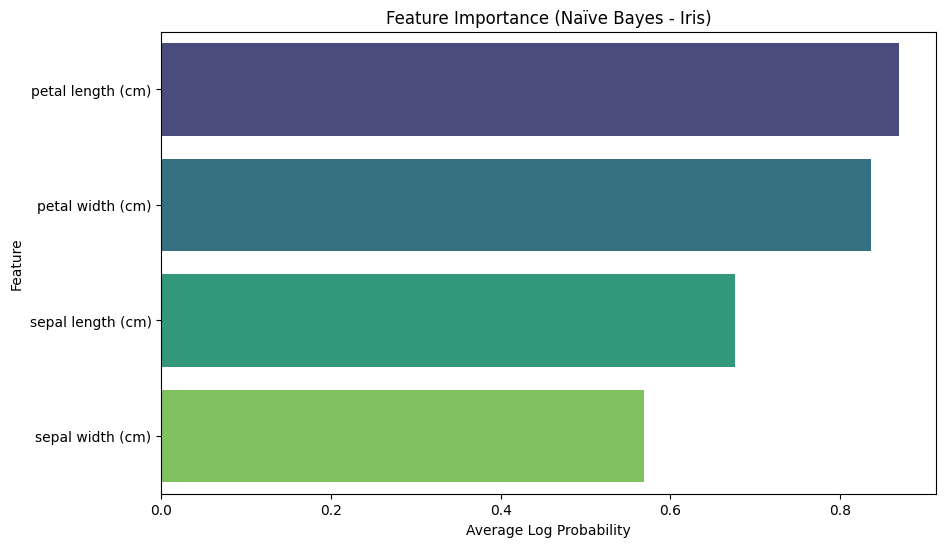

In [ ]:

# Mengambil log probabilitas kelas untuk analisis feature importance
feature_importance = np.abs(nb.theta_).mean(axis=0)

# Membuat DataFrame untuk visualisasi
feature_df = pd.DataFrame({"Feature": feature_names, "Importance": feature_importance})
feature_df = feature_df.sort_values(by="Importance", ascending=False)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_df, palette="viridis")
plt.title("Feature Importance (Naïve Bayes - Iris)")
plt.xlabel("Average Log Probability")
plt.ylabel("Feature")
plt.show()
